# COLLEGE EVENT FEEDBACK ANALYSIS

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re
import string

In [131]:
feedback= pd.read_csv(r"C:\Users\Vikas\Desktop\FUTURE_DS_03\Dataset\student_feedback.csv")
Statisfaction = pd.read_csv(r"C:\Users\Vikas\Desktop\FUTURE_DS_03\Dataset\Student_Satisfaction_Survey.csv",encoding="ISO-8859-1")


## Cleaning the Student feedback data

In [132]:
feedback.rename(columns={
    "Unnamed: 0": "ID",
    "Student ID": "Student_ID",
    "Well versed with the subject": "Subject_Knowledge",
    "Explains concepts in an understandable way": "Concept_Clarity",
    "Use of presentations": "Presentations",
    "Degree of difficulty of assignments": "Assignment_Difficulty",
    "Solves doubts willingly": "Doubt_Solving",
    "Structuring of the course": "Course_Structure",
    "Provides support for students going above and beyond": "Extra_Support",
    "Course recommendation based on relevance": "Course_Recommendation"
}, inplace=True)


In [133]:
feedback.head(3)


,ID,Student_ID,Subject_Knowledge,Concept_Clarity,Presentations,Assignment_Difficulty,Doubt_Solving,Course_Structure,Extra_Support,Course_Recommendation
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1


In [134]:
feedback.shape

(1001, 10)

In [135]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ID                     1001 non-null   int64
 1   Student_ID             1001 non-null   int64
 2   Subject_Knowledge      1001 non-null   int64
 3   Concept_Clarity        1001 non-null   int64
 4   Presentations          1001 non-null   int64
 5   Assignment_Difficulty  1001 non-null   int64
 6   Doubt_Solving          1001 non-null   int64
 7   Course_Structure       1001 non-null   int64
 8   Extra_Support          1001 non-null   int64
 9   Course_Recommendation  1001 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [136]:
feedback.isnull().sum()

ID                       0
Student_ID               0
Subject_Knowledge        0
Concept_Clarity          0
Presentations            0
Assignment_Difficulty    0
Doubt_Solving            0
Course_Structure         0
Extra_Support            0
Course_Recommendation    0
dtype: int64

In [137]:
# Check for duplicate values
feedback.duplicated().sum()

np.int64(0)

## Cleaning the Student Satisfaction Survery data

In [138]:
Statisfaction.head(3)

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [139]:
Statisfaction.rename(columns={
    'SN': 'SN',
    'Total Feedback Given': 'Feedback',
    'Total Configured': 'Configured',
    'Questions': 'Ques',
    'Weightage 1': 'W1',
    'Weightage 2': 'W2',
    'Weightage 3': 'W3',
    'Weightage 4': 'W4',
    'Weightage 5': 'W5',
    'Average/ Percentage': 'Avg%',
    'Course Name': 'Course',
    'Basic Course': 'Basic'
}, inplace=True)

In [140]:
Statisfaction.shape

(580, 12)

In [141]:
Statisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SN            580 non-null    int64 
 1   Feedback      580 non-null    int64 
 2   Configured    580 non-null    int64 
 3   Ques          580 non-null    object
 4   W1            580 non-null    int64 
 5   W2            580 non-null    int64 
 6   W3            580 non-null    int64 
 7   W4            580 non-null    int64 
 8   W5            580 non-null    int64 
 9   Avg%          580 non-null    object
 10  Course Name   580 non-null    object
 11  Basic         580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [142]:
Statisfaction.isnull().sum()

SN              0
Feedback        0
Configured      0
Ques            0
W1              0
W2              0
W3              0
W4              0
W5              0
Avg%            0
Course Name     0
Basic           0
dtype: int64

In [143]:
# Check for duplicate values
Statisfaction.duplicated().sum()

np.int64(0)

In [144]:
Statisfaction["Course Name "].unique()

array(['FY B.VOC FOOD TECHNOLOGY', 'FYBA',
       'FY BCOM (ACCOUNTING & FINANCE)', 'FY BCOM (BANKING & INSURANCE)',
       'FYBMS ', 'FYBSC', 'MA PSYCHOLOGY - 1', 'MA PSYCHOLOGY - 3',
       'M.SC PART - 1 COMPUTER SCIENCE', 'MSC ANALYTICAL CHEMISTRY SEM I',
       'MSC DATA SCIENCE - 1', 'MSC INFORMATION TECHNOLOGY - 1',
       'MSC MICROBIOLOGY - 1', 'MSC ANALYTICAL CHEMISTRY SEM III',
       'M.SC PART - 2 COMPUTER SCIENCE', 'MSC DATA SCIENCE - 3',
       'MSC INFORMATION TECHNOLOGY - 3', 'MSC MICROBIOLOGY - 3',
       'MSC ORGANIC CHEMISTRY - 3', 'MSC PHYSICS - 3', 'S.Y.B.A.F',
       'SYBCOM', 'SYBMS ', 'SYBSC', 'SY COMPUTER SCIENCE', 'TYBA',
       'TYBCOM', 'TYBMS ', 'TYBSC '], dtype=object)

In [145]:
le = LabelEncoder()
Statisfaction['Course_Code'] = le.fit_transform(Statisfaction['Course Name '])
Statisfaction[['Course Name ', 'Course_Code']].head(3)

,Course Name,Course_Code
0,FY B.VOC FOOD TECHNOLOGY,0
1,FY B.VOC FOOD TECHNOLOGY,0
2,FY B.VOC FOOD TECHNOLOGY,0


In [146]:
Statisfaction["Basic"].unique()

array(['B.VOC FOOD TECHNOLOGY', 'BACHELOR OF ARTS',
       'BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)',
       'BACHELOR OF COMMERCE (BANKING AND INSURANCE)',
       'BACHELOR OF MANAGEMENT STUDIES', 'BACHELOR OF SCIENCE',
       'MA PSYCHOLOGY', 'MSC COMPUTER SCIENCE',
       'MSC ANALYTICAL CHEMISTRY', 'MSC DATA SCIENCE',
       'MSC INFORMATION TECHNOLOGY', 'MSC MICROBIOLOGY',
       'MSC ORGANIC CHEMISTRY', 'MSC PHYSICS', 'BACHELOR OF COMMERCE',
       'B.SC. COMPUTER SCIENCE'], dtype=object)

In [147]:
Statisfaction['Basic_InCode'] = le.fit_transform(Statisfaction['Basic'])
Statisfaction[['Basic', 'Basic_InCode']].head(3)

,Basic,Basic_InCode
0,B.VOC FOOD TECHNOLOGY,1
1,B.VOC FOOD TECHNOLOGY,1
2,B.VOC FOOD TECHNOLOGY,1


## Charts & Visualizations on Feedback Dataset

## Ratings Distribution Chart

C:\Users\Vikas\AppData\Local\Temp\ipykernel_6688\241228421.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Vikas\AppData\Local\Temp\ipykernel_6688\241228421.py:13: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


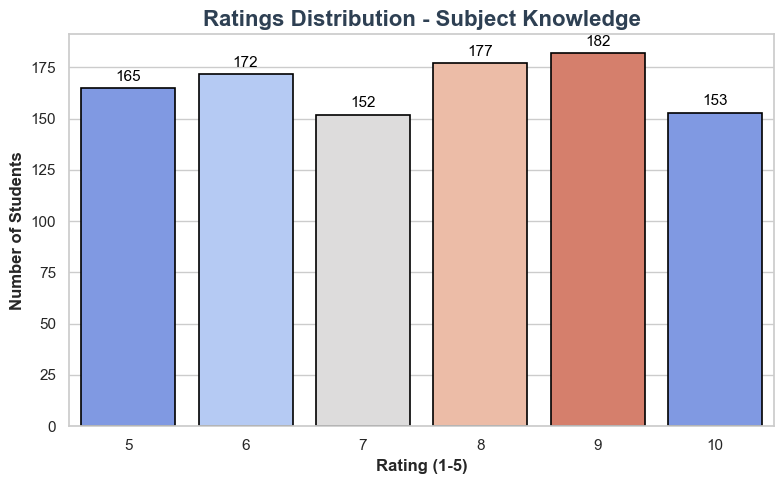

In [154]:
# Seaborn theme
sns.set_theme(style="whitegrid")

# Choose a question column (example: Subject_Knowledge)
question_col = "Subject_Knowledge"

plt.figure(figsize=(8,5))

# Beautiful gradient color palette
colors = sns.color_palette("coolwarm", 5)  # For ratings 1–5

# Plot ratings count
sns.countplot(
    x=question_col,
    data=feedback,
    palette=colors,
    edgecolor='black',
    linewidth=1.2
)

# Title & labels
plt.title(f"Ratings Distribution - {question_col.replace('_', ' ')}", fontsize=16, fontweight='bold', color="#2E4053")
plt.xlabel("Rating (1-5)", fontsize=12, fontweight='bold')
plt.ylabel("Number of Students", fontsize=12, fontweight='bold')

# Add numbers above bars
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()